In [3]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
image = cv2.imread('image.jpg')

In [5]:
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [6]:
image.shape

(808L, 766L, 3L)

In [7]:
image = image.reshape(image.shape[0]*image.shape[1],3)

In [8]:
image.shape


(618928L, 3L)

In [9]:
from sklearn.cluster import KMeans

In [10]:
clf = KMeans(n_clusters = 3)

In [11]:
clf.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
clf.labels_


array([1, 1, 1, ..., 1, 1, 1])

In [13]:
label = [0,0,0]
for x in clf.labels_:
    label[x] += 1

In [14]:
label

[366813, 193958, 58157]

In [15]:
label_sum = image.shape[0]

In [16]:
label_sum

618928L

In [17]:
[(float(x)/label_sum)*100 for x in label]

[59.26585967996277, 31.33773233720239, 9.396407982834837]

In [18]:
clf.cluster_centers_

array([[  22.41275848,   21.89548683,   21.04670747],
       [ 254.18389643,  254.18076171,  254.17903453],
       [ 177.8245065 ,  155.11756311,   89.74475549]])

In [19]:
centroids = [x.astype('uint8').tolist() for x in clf.cluster_centers_]

In [20]:
centroids

[[22, 21, 21], [254, 254, 254], [177, 155, 89]]

In [21]:
import webcolors

In [22]:
clr = [webcolors.rgb_to_hex(x) for x in centroids]

In [23]:
clr

[u'#161515', u'#fefefe', u'#b19b59']

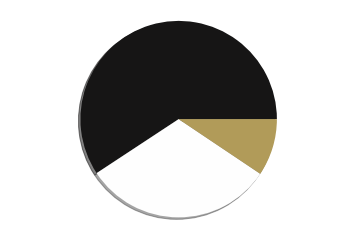

In [24]:
plt.pie(label,colors=clr,shadow=True)
plt.axis('equal')
plt.show()

In [25]:
import pandas as pd
df = pd.DataFrame({
    'Image':[],
    'Dominant color percentage':[],
    'Color':[]
})

Image 1 


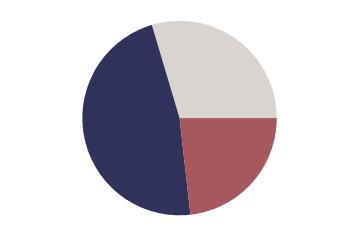

Image 2 


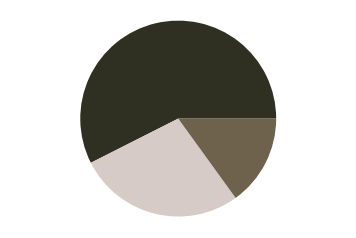

Image 3 


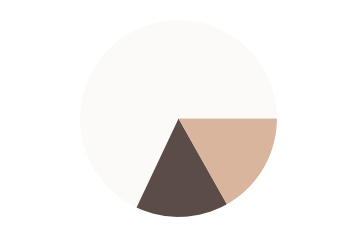

Image 4 


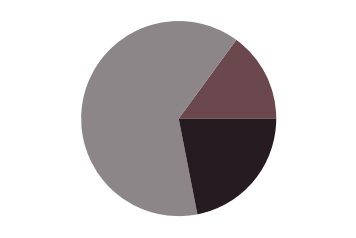

Image 5 


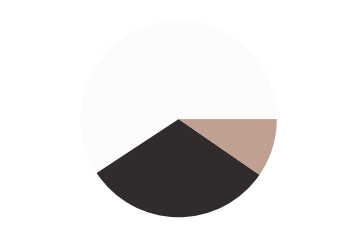

Image 6 


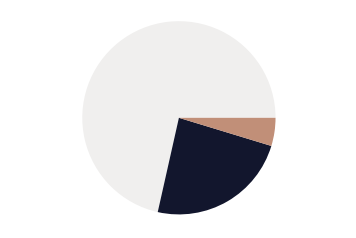

Image 7 


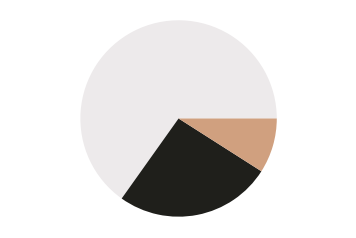

Image 8 


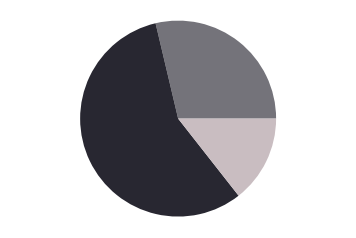

Image 9 


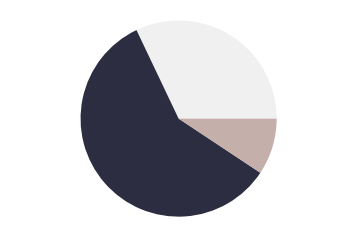

Image 10 


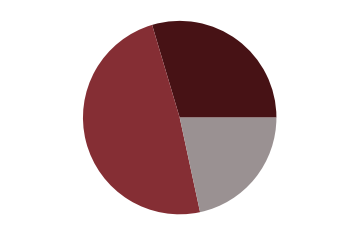

In [27]:
data = []
for i in range(1,11):
    print 'Image %s ' %i
    image = cv2.imread('Image '+str(i)+'.jpg')
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = image.reshape(image.shape[0]*image.shape[1],3)
    clf = KMeans(n_clusters=3).fit(image)
    label = [0,0,0]
    for x in clf.labels_:
        label[x] += 1
    label_sum = image.shape[0]
    label = [(float(x)/label_sum)*100 for x in label]
    m = max(label)
    y = label.index(m)
    centroids = [x.astype('uint8').tolist() for x in clf.cluster_centers_]
    clr = [webcolors.rgb_to_hex(x) for x in centroids]
    dc = clr[y]
    plt.pie(label,colors=clr)
    plt.axis('equal')
    plt.show()
    l = []
    l.append('Image'+str(i))
    l.append(m)
    l.append(dc)
    data.append(l)
    df = df.append(pd.DataFrame({
        'Image':[data[i-1][0]],    
        'Dominant color percentage':[data[i-1][1]],
        'Color':[data[i-1][2]]
    }))
    
    

In [28]:
print df

     Color  Dominant color percentage    Image
0  #30325b                  47.185872   Image1
0  #2f3022                  57.456055   Image2
0  #fbfaf8                  67.976562   Image3
0  #8c8688                  63.125651   Image4
0  #fbfbfa                  59.257487   Image5
0  #f0efee                  71.481771   Image6
0  #edeaeb                  65.162435   Image7
0  #282731                  56.889648   Image8
0  #2c2d40                  58.611979   Image9
0  #852e34                  48.775716  Image10


In [29]:
import seaborn as sns
sns.set()

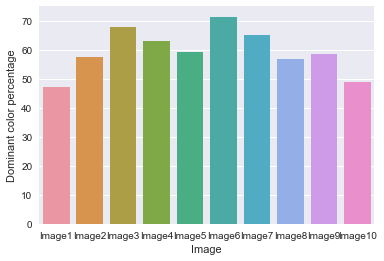

In [31]:
sns.barplot(data=df,x="Image",y='Dominant color percentage')

In [32]:
Color = [['Blue',20.84],['Black',11.5],['White',29.61],['Red',10.16],['Grey',18.47],['Green',1.41],
           ['Salmon',5.5],['Brown',2.45]]
graph = pd.DataFrame(Color,columns=['Color','Average'],dtype=float)
print graph

    Color  Average
0    Blue    20.84
1   Black    11.50
2   White    29.61
3     Red    10.16
4    Grey    18.47
5   Green     1.41
6  Salmon     5.50
7   Brown     2.45


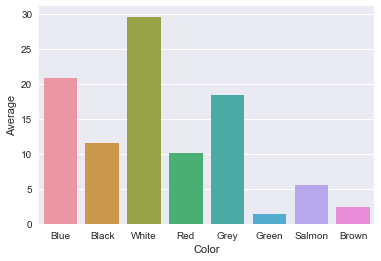

In [33]:
sns.barplot(x='Color',y='Average',data=graph)